MNIST

In [1]:
import sys
import os

cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(parent_dir)


import dezero

train_set = dezero.datasets.MNIST(train=True, transform=None)
test_set = dezero.datasets.MNIST(train=False, transform=None)

print(len(train_set))
print(len(test_set))


Downloading: train-images-idx3-ubyte.gz
[##############################] 100.00% Done
Downloading: train-labels-idx1-ubyte.gz
[##############################] 100.00% Done
Downloading: t10k-images-idx3-ubyte.gz
[##############################] 100.00% Done
Downloading: t10k-labels-idx1-ubyte.gz
[##############################] 100.00% Done
60000
10000


In [3]:
x, t = train_set[0]
print(type(x), x.shape)
print(t)

<class 'numpy.ndarray'> (1, 28, 28)
5


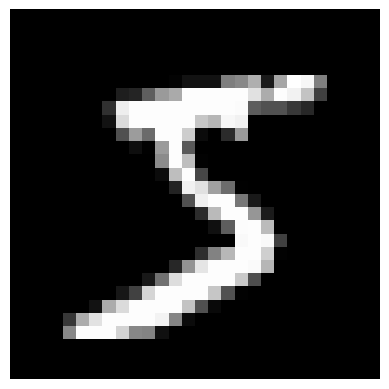

label: 5


In [5]:
import matplotlib.pyplot as plt

x, t = train_set[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

In [7]:
def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x


train_set = dezero.datasets.MNIST(train=True, transform=f)
test_set = dezero.datasets.MNIST(train=False, transform=f)

In [13]:
from dezero import DataLoader
import dezero
import dezero.functions as F
from dezero.models import MLP
from dezero import optimizers

max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = dezero.datasets.MNIST(train=True)
test_set = dezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.SGD().setup(model)
#model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
#optimizer = optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 1.9019, accuracy: 0.5603
test loss: 1.5245, accuracy: 0.7425
epoch: 2
train loss: 1.2755, accuracy: 0.7703
test loss: 1.0379, accuracy: 0.8136
epoch: 3
train loss: 0.9216, accuracy: 0.8188
test loss: 0.7915, accuracy: 0.8359
epoch: 4
train loss: 0.7390, accuracy: 0.8407
test loss: 0.6553, accuracy: 0.8578
epoch: 5
train loss: 0.6347, accuracy: 0.8545
test loss: 0.5756, accuracy: 0.8696


In [17]:
class ReLU(Function):
    def forward(self, x):
        y = xp.maximum(x, 0.0)
        return y

    def backward(self, gy):
        x, = self.inputs
        mask = x.data > 0
        gx = gy * mask
        return gx

NameError: name 'Function' is not defined

In [19]:
model = MLP((hidden_size, hidden_size, 10), activation=F.relu)

In [21]:
from dezero import DataLoader
import dezero
import dezero.functions as F
from dezero.models import MLP
from dezero import optimizers

max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = dezero.datasets.MNIST(train=True)
test_set = dezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.Adam().setup(model)
#model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
#optimizer = optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 0.4073, accuracy: 0.8883
test loss: 0.2460, accuracy: 0.9279
epoch: 2
train loss: 0.2258, accuracy: 0.9342
test loss: 0.1896, accuracy: 0.9429
epoch: 3
train loss: 0.1658, accuracy: 0.9521
test loss: 0.1406, accuracy: 0.9570
epoch: 4
train loss: 0.1251, accuracy: 0.9633
test loss: 0.1119, accuracy: 0.9668
epoch: 5
train loss: 0.0963, accuracy: 0.9717
test loss: 0.1059, accuracy: 0.9681
